In [2]:
from google.colab import files
uploaded = files.upload()

Saving MarathonData.csv to MarathonData.csv


**PHASE 1: DATA PREPARATION**

* 1. Model will be as good as data has beed prepared
* 2. Review data types, ¿Does it make sense to you?
* 3. Drop "No sense data". It means, if it´s no necesary to resolve the problem 
* 4. Drop or do something with NaNs (0, mean or drop)
* 5. Drop "Outliers"



In [3]:
import io #Python module. Gives all principal facilities from python to manage i/o
import pandas as pd #For data manipulation and analysis 
data_maraton = pd.read_csv(io.BytesIO(uploaded['MarathonData.csv']))

In [4]:
data_maraton

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


In [5]:
data_maraton['Name']

0         Blair MORGAN
1        Robert Heczko
2        Michon Jerome
3        Daniel Or lek
4         Luk ? Mr zek
            ...       
82    Stefano Vegliani
83      Andrej Madliak
84          Yoi Ohsako
85          Simon Dunn
86         Pavel ?imek
Name: Name, Length: 87, dtype: object

In [6]:
data_maraton.info() #A quick glance. We can see total quantity of columns and its dtype.  This part help us in the "Preparation data phase"
#Wall21 has numeric data, so we need to change its type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [7]:
data_maraton['Wall21']=pd.to_numeric(data_maraton['Wall21'], errors='coerce') #invalid parsing will be set as NaN

In [8]:
data_maraton.describe() #Uff, beautiful tool! For each column with numeric data its describe stats will be showed :3

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1710030b10>,
      dtype=object)

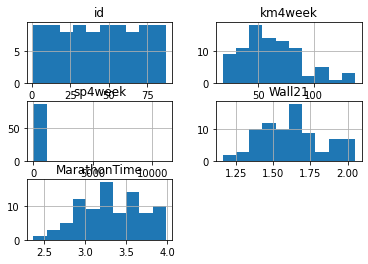

In [9]:
data_maraton.hist()

In [10]:
#Which columns we need
data_maraton = data_maraton.drop(columns=['Name'])
data_maraton = data_maraton.drop(columns=['id'])
data_maraton = data_maraton.drop(columns=['Marathon'])
data_maraton = data_maraton.drop(columns=['CATEGORY'])
data_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,NaN,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,NaN,1.94,3.94
85,M45,33.2,11.066667,NaN,2.05,3.95


In [11]:
#Now, let´s review if we have null data
data_maraton.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
dtype: int64

In [12]:
data_maraton['CrossTraining'] = data_maraton['CrossTraining'].fillna(0)
data_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [13]:
data_maraton = data_maraton.dropna(how='any') #We´re goin to drop each register has contain nulls value
data_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [14]:
#Next step. We need to deal with not numerical data. In this table, we have two columns: Category and CrossTraining
#How many differents values we have in CrossTraining?
data_maraton['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

In [15]:
valores_cross={'CrossTraining': {'ciclista 1h':1, 'ciclista 3h': 2, 'ciclista 4h':3, 'ciclista 5h':4, 'ciclista 13h':5 }}
data_maraton.replace(valores_cross, inplace=True)
data_maraton

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,2,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [16]:
#How many differents values we have in CrossTraining?
data_maraton['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [17]:
valores_category={'Category': {'MAM':1, 'M45': 2, 'M40':3, 'M50':4, 'M55':5, 'WAM':6 }}
data_maraton.replace(valores_category, inplace=True)
data_maraton

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


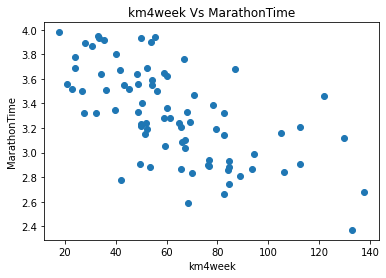

In [18]:
#Data is ready :D
#Now, I´m going to compare MarathonTime versus any other column with could have a relationship
import matplotlib.pyplot as plt
plt.scatter(x=data_maraton['km4week'], y=data_maraton['MarathonTime'])
plt.title('km4week Vs MarathonTime')
plt.xlabel('km4week')
plt.ylabel('MarathonTime')
plt.show()

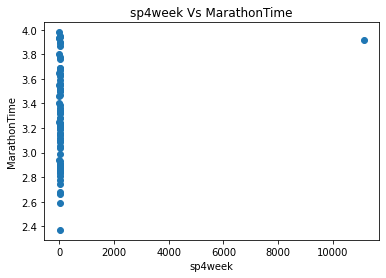

In [19]:
plt.scatter(x=data_maraton['sp4week'], y=data_maraton['MarathonTime'])
plt.title('sp4week Vs MarathonTime')
plt.xlabel('sp4week')
plt.ylabel('MarathonTime')
plt.show()  #There´s an outlier. Its value doesn't make sense.

In [20]:
#Let´s drop this value
data_maraton= data_maraton.query('sp4week < 1000')


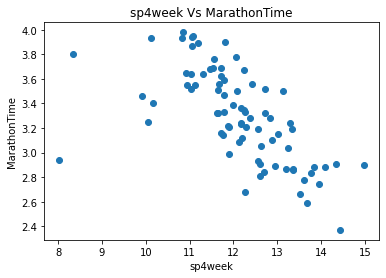

In [23]:
#Make the graph again, omg!
plt.scatter(x=data_maraton['sp4week'], y=data_maraton['MarathonTime'])
plt.title('sp4week Vs MarathonTime')
plt.xlabel('sp4week')
plt.ylabel('MarathonTime')
plt.show() 

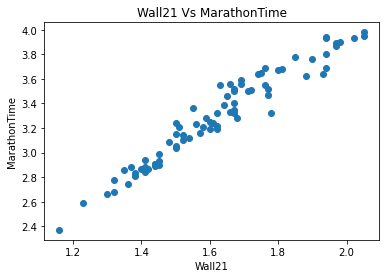

In [24]:
plt.scatter(x=data_maraton['Wall21'], y=data_maraton['MarathonTime'])
plt.title('Wall21 Vs MarathonTime')
plt.xlabel('Wall21')
plt.ylabel('MarathonTime')
plt.show()

**PHASE 2: TRAINING MODEL**
* 1. First, we have two types of data. The **predictor variables** and **the prediction**

* 2. We´re going to use 80% of these predictor variables for **TRAINING** and the other 20% for **VALIDATION**.

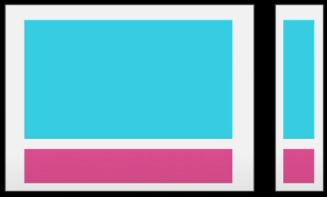

* 3. **How much accuracy is acceptable in machine learning?**
Anything greater than 70% is a great model performance. In fact, an accuracy measure of anything between 70%-90% is not only ideal, it's realistic.

In [34]:
data_training = data_maraton.sample(frac=0.8, random_state=0)
data_testing = data_maraton.drop(data_training.index)
data_training

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
54,3,70.7,11.783333,0,1.77,3.47
28,2,51.6,13.008403,0,1.50,3.15
31,1,79.4,13.344538,0,1.60,3.19
84,3,55.4,11.043189,0,1.94,3.94
47,2,39.6,12.247423,0,1.67,3.35
...,...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67,3.50
20,1,94.5,11.886792,0,1.45,2.99
79,1,53.9,11.802920,0,1.98,3.90
8,1,70.0,13.770492,1,1.38,2.83


In [35]:
training_label = data_training.pop('MarathonTime')
testing_label = data_testing.pop('MarathonTime')
training_label #MarathonTime data 

54    3.47
28    3.15
31    3.19
84    3.94
47    3.35
      ... 
55    3.50
20    2.99
79    3.90
8     2.83
13    2.88
Name: MarathonTime, Length: 64, dtype: float64

In [36]:
data_training #Marathon data is not here.

,Category,km4week,sp4week,CrossTraining,Wall21
54,3,70.7,11.783333,0,1.77
28,2,51.6,13.008403,0,1.50
31,1,79.4,13.344538,0,1.60
84,3,55.4,11.043189,0,1.94
47,2,39.6,12.247423,0,1.67
...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67
20,1,94.5,11.886792,0,1.45
79,1,53.9,11.802920,0,1.98
8,1,70.0,13.770492,1,1.38


In [46]:
#Training...
#Sklearn is Simple and efficient tools for predictive data analysis. Built on NumPy, SciPy, and matplotlib

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_training, training_label)

LinearRegression()

In [40]:
predict = model.predict(data_testing)
predict

array([2.79390706, 2.81599412, 3.05747527, 3.0497715 , 3.0601308 ,
       3.29473308, 3.36211907, 3.36226188, 3.17473152, 3.29138286,
       3.37757783, 3.5216523 , 3.5919168 , 3.55016407, 3.66416024,
       3.85281097])

In [41]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(testing_label,predict))
print('Error porcentual: %f' % (error*100)) 


Error porcentual: 11.030345


In [44]:
new_runner = pd.DataFrame(np.array([[1,400,15,0,1.4]]), columns=['Category','km4week','sp4week','CrossTraining','Wall21'])
new_runner

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,15.0,0.0,1.4


In [47]:
model.predict(new_runner)

array([2.33246381])